In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import holidays

In [2]:
# automatic datetime conversion
dfPM10 = pd.read_csv('data/1h/PM10.csv', index_col=0, parse_dates=True)
dfPM25 = pd.read_csv('data/1h/PM2.5.csv', index_col=0, parse_dates=True)
dfs = {'PM10': dfPM10, 'PM25': dfPM25}

In [3]:
dfPM10.index = pd.to_datetime(dfPM10.index, format='mixed')
dfPM25.index = pd.to_datetime(dfPM25.index, format='mixed')

In [4]:
for df in dfs.values():
    display(df)

,MpKrakAlKras,MpKrakDietla,MpKrakWadow,MpKrakBulwar,MpKrakSwoszo,MpKrakPrad,MpKrakTelime,MpKrakBujaka,MpKrakZloRog,MpKrakOsPias
data,,,,,,,,,,
2004-01-01 01:00:00,44.0,NaN,NaN,68.0,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-01 02:00:00,61.0,NaN,NaN,91.0,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-01 03:00:00,35.0,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-01 04:00:00,39.0,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-01 05:00:00,23.0,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-12-31 20:00:00,NaN,31.4861,22.9874,NaN,34.2248,NaN,NaN,NaN,32.3285,24.1855
2023-12-31 21:00:00,NaN,39.8371,28.0558,NaN,22.5504,NaN,NaN,NaN,38.2589,37.9393
2023-12-31 22:00:00,NaN,42.2331,30.9363,NaN,30.0140,NaN,NaN,NaN,41.0132,31.8240


,MpKrakAlKras,MpKrakPrad,MpKrakBujaka,MpKrakBulwar
data,,,,
2006-01-03 01:00:00,NaN,NaN,NaN,NaN
2006-01-03 02:00:00,NaN,NaN,NaN,NaN
2006-01-03 03:00:00,NaN,NaN,NaN,NaN
2006-01-03 04:00:00,NaN,NaN,NaN,NaN
2006-01-03 05:00:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2023-12-31 20:00:00,NaN,NaN,NaN,NaN
2023-12-31 21:00:00,NaN,NaN,NaN,NaN
2023-12-31 22:00:00,NaN,NaN,NaN,NaN


In [5]:
for p in dfs:
    print(f"Procent brakujących danych dla {p}:\n {dfs[p].isnull().sum()/dfs[p].shape[0]*100}")

Procent brakujących danych dla PM10:
 MpKrakAlKras    45.636240
MpKrakDietla    60.811435
MpKrakWadow     65.517143
MpKrakBulwar    47.800295
MpKrakSwoszo    75.781860
MpKrakPrad      75.671775
MpKrakTelime    93.035552
MpKrakBujaka    73.569893
MpKrakZloRog    60.889578
MpKrakOsPias    61.805053
dtype: float64
Procent brakujących danych dla PM25:
 MpKrakAlKras    66.612142
MpKrakPrad      88.220861
MpKrakBujaka    70.685611
MpKrakBulwar    60.835743
dtype: float64


In [6]:
# there are significant missing values
# two ideas
# 1. choosing a station with the biggest number of values
# 2. combining all stations in one city

In [7]:
def plotting_station(df, rows, cols, parameter):
    fig, axes = plt.subplots(rows, cols, figsize=(16, 6), sharex=True)
    dateX = df.index
    for i, ax in enumerate(axes.flat): # diffrent col number
        df.iloc[:, i].plot(ax=ax, title=df.columns[i], legend=False)
        ax.set_xlim(dateX.min(), dateX.max())
        ax.set_ylabel(parameter)
        ax.grid()     
    fig.tight_layout()
    plt.show()
    return

In [8]:
import itertools

def stations_comparison(df):
    comparison = []
    # 45 pairs combinations
    for col1, col2 in itertools.combinations(df.columns, 2):
        common_indices = df[df[col1].notnull() & df[col2].notnull()].index
        diff = df.loc[common_indices, col1] - df.loc[common_indices, col2]
        if not common_indices.empty:     
            comparison.append({
                'col1': col1,
                'col2': col2,
                'mean': diff.mean(), # which is usually bigger
                'mean_abs': diff.abs().mean(), # size of differences
                'rms': (diff**2).mean()**0.5,
                'max_diff': diff.abs().max(),
                'count': len(common_indices)
            })
    return pd.DataFrame(comparison)

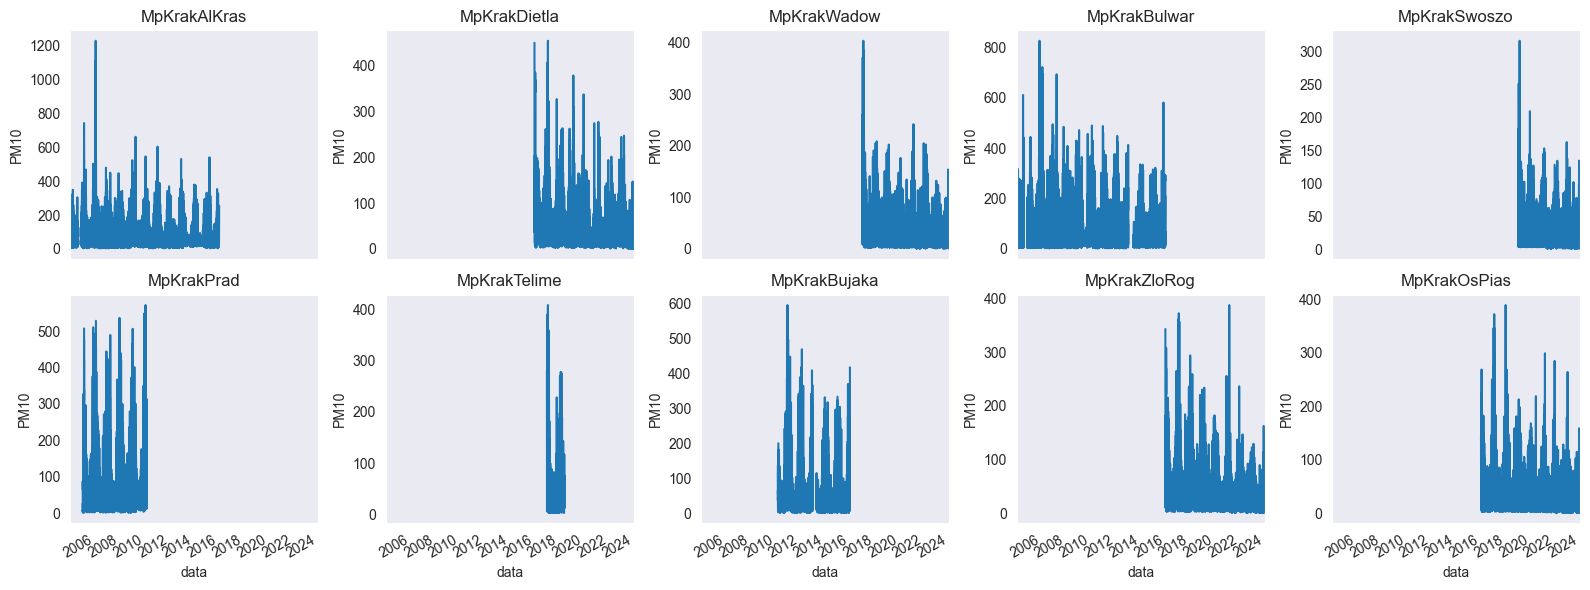

In [9]:
plotting_station(dfPM10, 2, 5, 'PM10') 

In [10]:
stations_comparison(dfPM10)
# high differences

,col1,col2,mean,mean_abs,rms,max_diff,count
0,MpKrakAlKras,MpKrakBulwar,19.220016,26.626626,40.186961,763.0000,84514
1,MpKrakAlKras,MpKrakPrad,29.429494,34.361350,50.117485,843.0000,38536
2,MpKrakAlKras,MpKrakBujaka,18.751857,23.001756,34.129989,450.6968,44355
3,MpKrakDietla,MpKrakWadow,5.977361,11.412381,18.405089,279.0516,59176
4,MpKrakDietla,MpKrakSwoszo,4.756122,10.574272,16.567092,287.7360,41567
5,MpKrakDietla,MpKrakTelime,8.031775,14.344419,22.845727,245.1866,12100
6,MpKrakDietla,MpKrakZloRog,2.454113,9.783714,15.509251,245.4968,67161
7,MpKrakDietla,MpKrakOsPias,5.457730,11.039267,17.620477,343.5335,65585
8,MpKrakWadow,MpKrakSwoszo,0.791730,8.597664,13.554411,242.1813,42065
9,MpKrakWadow,MpKrakTelime,-3.867499,12.492235,21.596324,251.6454,11781


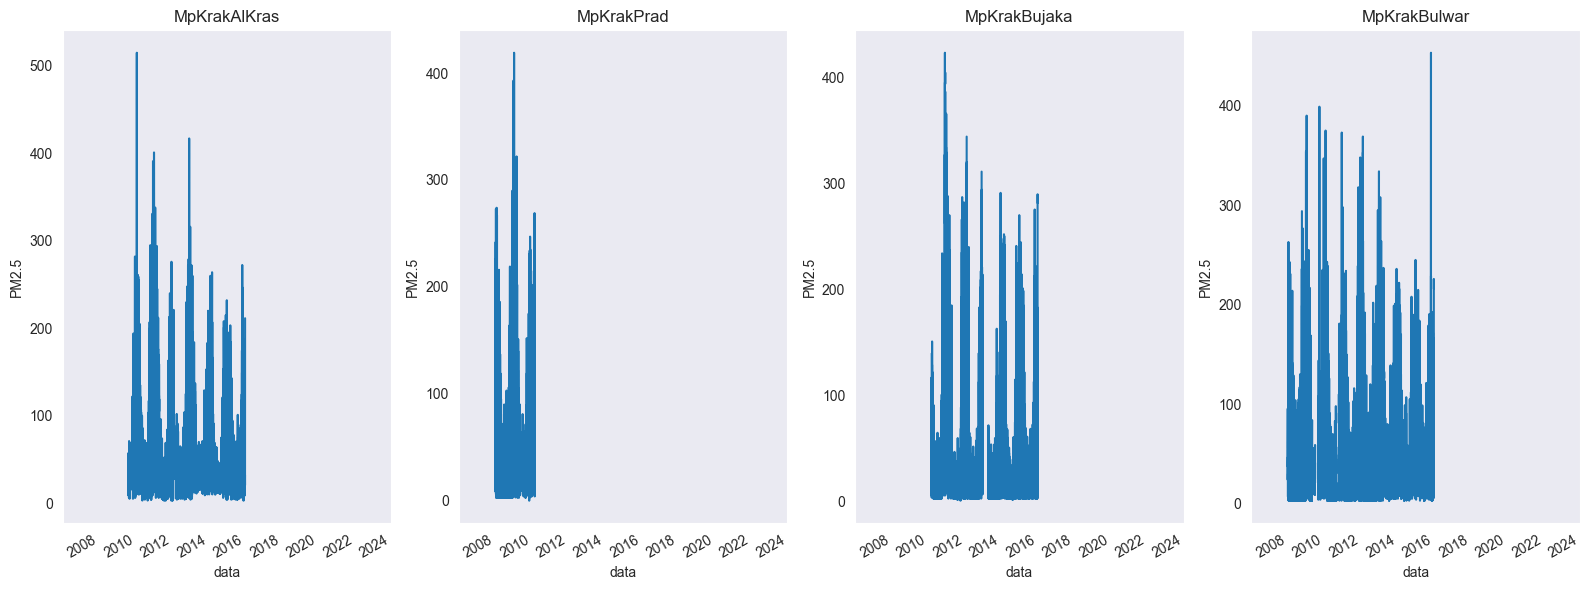

In [11]:
plotting_station(dfPM25, 1, 4, 'PM2.5')

In [12]:
stations_comparison(dfPM25)

,col1,col2,mean,mean_abs,rms,max_diff,count
0,MpKrakAlKras,MpKrakPrad,15.587245,21.737821,29.670277,155.000,3387
1,MpKrakAlKras,MpKrakBujaka,14.053419,16.636776,24.033369,282.000,44169
2,MpKrakAlKras,MpKrakBulwar,12.936544,16.161983,24.154487,341.000,45911
3,MpKrakPrad,MpKrakBulwar,-2.405856,11.074604,21.013253,360.000,16018
4,MpKrakBujaka,MpKrakBulwar,-1.383139,10.847896,19.583150,372.622,41170


In [13]:
weather = pd.read_csv('weather/1h/weather_filled.csv', index_col=0, parse_dates=True)
weather 

,AirTemp,rainIntensity,rainAccumulation,maxWindSpeed,RelativeHumidity,WindDirection,WindSpeed,AirPressure
2016-01-01 00:00:00,-8.871667,0.000000,0.00,1.7,70.875000,280.0,0.771667,1000.903333
2016-01-01 01:00:00,-9.153333,0.000000,0.00,1.1,71.593333,265.0,0.703333,1000.516667
2016-01-01 02:00:00,-9.475000,0.000000,0.00,1.4,71.685000,269.0,0.698333,1000.363333
2016-01-01 03:00:00,-9.851667,0.000000,0.00,1.6,71.863333,283.0,0.743333,1000.123333
2016-01-01 04:00:00,-10.175000,0.000000,0.00,1.4,71.668333,286.0,0.661667,1000.190000
...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00,4.635000,0.000000,0.00,1.6,74.210000,77.0,0.866667,980.588333
2023-12-31 20:00:00,4.368333,0.000000,0.00,1.4,74.971667,21.0,0.721667,980.480000
2023-12-31 21:00:00,3.943333,0.000000,0.00,1.2,76.206667,339.0,0.546667,980.611667
2023-12-31 22:00:00,3.903333,0.000000,0.00,1.5,76.143333,329.0,0.585000,980.510000


In [45]:
weather = weather.iloc[1:]

In [46]:
weather.isnull().sum()

AirTemp             0
rainIntensity       0
rainAccumulation    0
maxWindSpeed        0
RelativeHumidity    0
WindDirection       0
WindSpeed           0
AirPressure         0
dtype: int64

In [20]:
dfPM10.columns

Index(['MpKrakAlKras', 'MpKrakDietla', 'MpKrakWadow', 'MpKrakBulwar',
       'MpKrakSwoszo', 'MpKrakPrad', 'MpKrakTelime', 'MpKrakBujaka',
       'MpKrakZloRog', 'MpKrakOsPias'],
      dtype='object')

In [28]:
stations = ['MpKrakDietla', 'MpKrakWadow', 'MpKrakSwoszo', 'MpKrakZloRog', 'MpKrakOsPias']
for station in stations:
    beginning = dfPM10[station][~dfPM10[station].isna()].index[0]
    print(f"Dla stacji {station} pomiary rozpoczynają się: {beginning}")

Dla stacji MpKrakDietla pomiary rozpoczynają się: 2016-01-01 01:00:00
Dla stacji MpKrakWadow pomiary rozpoczynają się: 2017-01-02 13:00:00
Dla stacji MpKrakSwoszo pomiary rozpoczynają się: 2019-01-07 22:00:00
Dla stacji MpKrakZloRog pomiary rozpoczynają się: 2016-01-01 01:00:00
Dla stacji MpKrakOsPias pomiary rozpoczynają się: 2016-01-06 13:00:00


In [47]:
temp = dfPM10.loc['2016-01-01 01:00:00':, ['MpKrakDietla', 'MpKrakZloRog', 'MpKrakOsPias']]
temp

,MpKrakDietla,MpKrakZloRog,MpKrakOsPias
data,,,
2016-01-01 01:00:00,449.5000,342.9240,NaN
2016-01-01 02:00:00,382.1000,329.6600,NaN
2016-01-01 03:00:00,327.5000,322.5390,NaN
2016-01-01 04:00:00,332.7000,294.5480,NaN
2016-01-01 05:00:00,332.9000,285.5270,NaN
...,...,...,...
2023-12-31 20:00:00,31.4861,32.3285,24.1855
2023-12-31 21:00:00,39.8371,38.2589,37.9393
2023-12-31 22:00:00,42.2331,41.0132,31.8240


In [48]:
temp.isnull().sum() / temp.shape[0]
# skip or interpolate?

MpKrakDietla    0.020291
MpKrakZloRog    0.022245
MpKrakOsPias    0.045132
dtype: float64

In [49]:
data = pd.concat([temp, weather], axis=1)

In [50]:
data[data.isnull().any(axis=1)]

,MpKrakDietla,MpKrakZloRog,MpKrakOsPias,AirTemp,rainIntensity,rainAccumulation,maxWindSpeed,RelativeHumidity,WindDirection,WindSpeed,AirPressure
2016-01-01 01:00:00,449.5000,342.9240,NaN,-9.153333,0.0,0.0,1.1,71.593333,265.0,0.703333,1000.516667
2016-01-01 02:00:00,382.1000,329.6600,NaN,-9.475000,0.0,0.0,1.4,71.685000,269.0,0.698333,1000.363333
2016-01-01 03:00:00,327.5000,322.5390,NaN,-9.851667,0.0,0.0,1.6,71.863333,283.0,0.743333,1000.123333
2016-01-01 04:00:00,332.7000,294.5480,NaN,-10.175000,0.0,0.0,1.4,71.668333,286.0,0.661667,1000.190000
2016-01-01 05:00:00,332.9000,285.5270,NaN,-10.160000,0.0,0.0,1.5,71.786667,250.0,0.600000,999.881667
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-29 15:00:00,14.5968,NaN,17.6399,10.420000,0.0,0.0,5.2,49.716667,249.0,3.216667,986.600000
2023-12-29 16:00:00,20.4222,NaN,10.7139,9.301667,0.0,0.0,4.1,52.845000,229.0,2.143333,986.560000
2023-12-29 17:00:00,27.3485,NaN,11.8042,8.658333,0.0,0.0,3.5,56.003333,224.0,2.580000,986.323333
2023-12-29 18:00:00,38.6776,NaN,20.1888,9.315000,0.0,0.0,3.4,55.205000,266.0,2.163333,986.440000


In [20]:
#data = data.dropna()

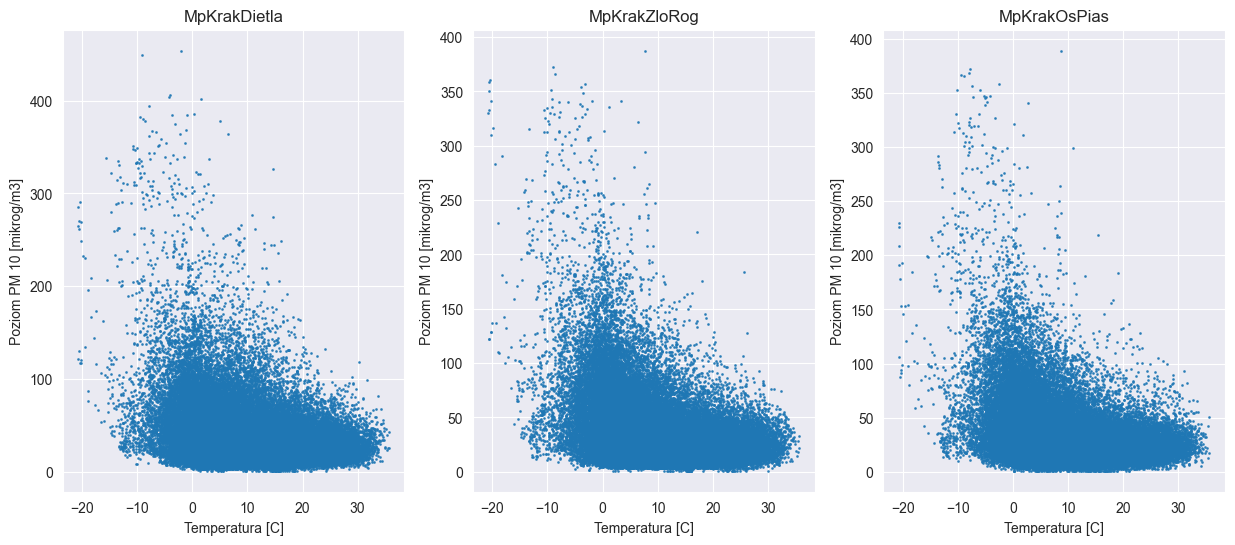

In [65]:
fig, axs = plt.subplots(1, 3, figsize=(15, 6))
for i, ax in enumerate(axs.flat):
    ax.scatter(data['AirTemp'], data.iloc[:,i], s=1, alpha=0.8)
    ax.set(ylabel='Poziom PM 10 [mikrog/m3]')
    ax.set(xlabel='Temperatura [C]')
    ax.set_title(data.columns[i])
plt.show()

In [22]:
# extreme temperature =/= extreme pollution
# depends on the day of the week, holidays

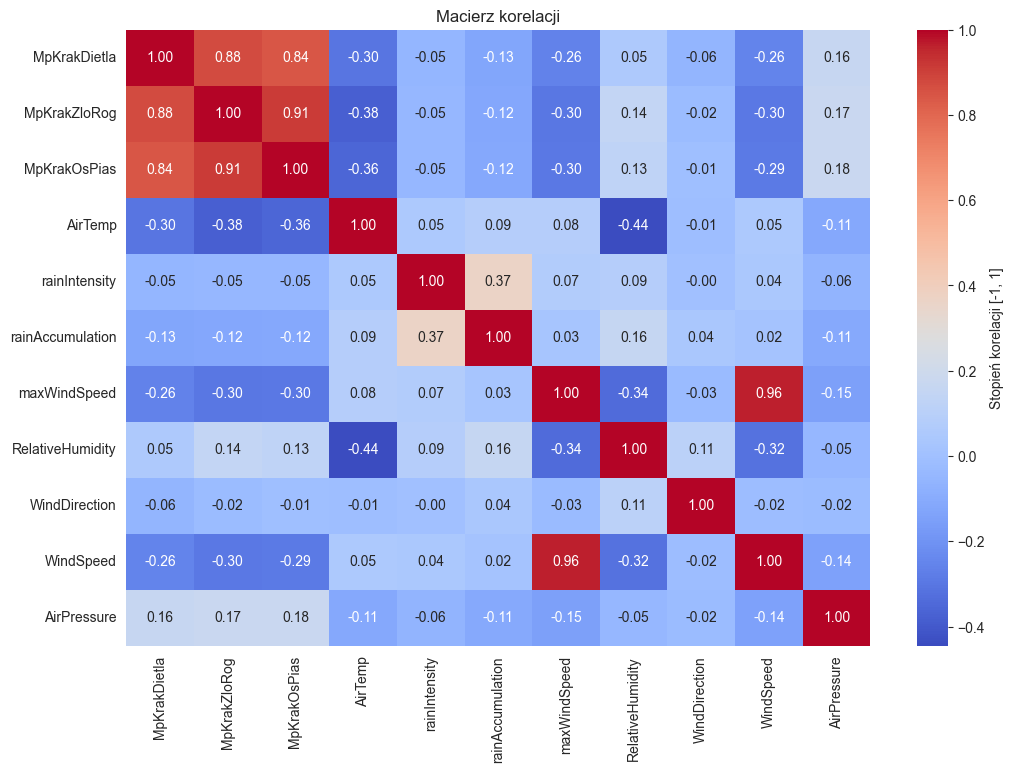

In [66]:
correlation = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Stopień korelacji [-1, 1]'})

plt.title('Macierz korelacji')
plt.show()

# stronger correlation then data/day

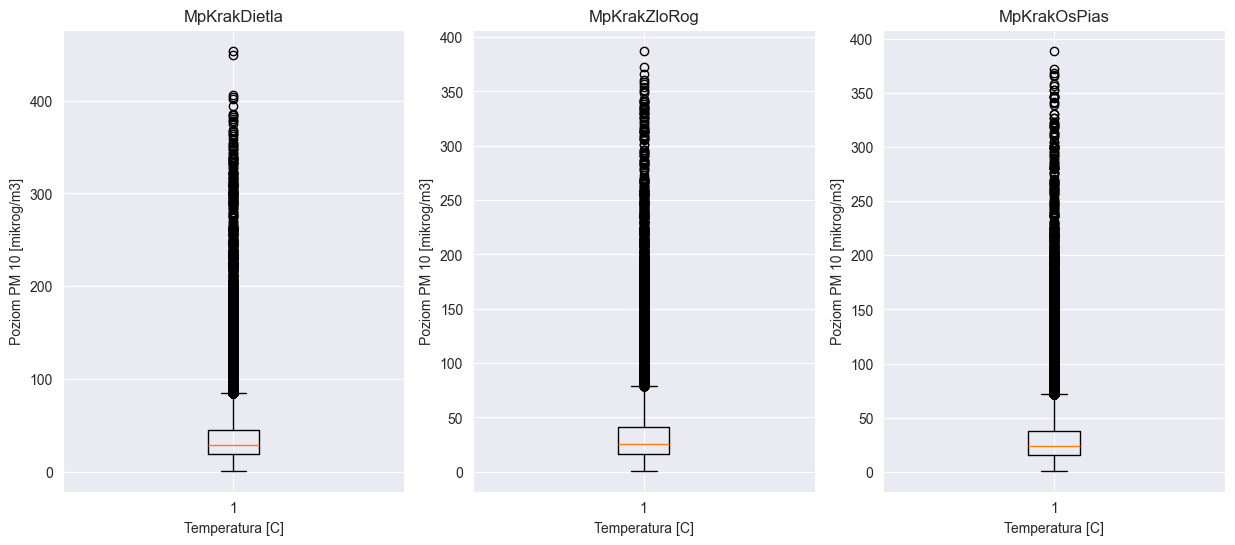

In [77]:
fig, axs = plt.subplots(1, 3, figsize=(15, 6))
for i, ax in enumerate(axs.flat):
    ax.boxplot(data.iloc[:,i].dropna())
    ax.set(ylabel='Poziom PM 10 [mikrog/m3]')
    ax.set(xlabel='Temperatura [C]')
    ax.set_title(data.columns[i])
plt.show()

In [80]:
data.describe()

,MpKrakDietla,MpKrakZloRog,MpKrakOsPias,AirTemp,rainIntensity,rainAccumulation,maxWindSpeed,RelativeHumidity,WindDirection,WindSpeed,AirPressure
count,68705.000000,68568.000000,66963.000000,70127.000000,70127.000000,70127.000000,70127.000000,70127.000000,70127.000000,70127.000000,70127.000000
mean,37.055746,34.481126,31.812386,10.740133,0.052505,0.630591,3.214516,62.058087,210.814386,1.738976,989.399494
std,31.207636,30.164816,27.682954,8.742440,0.480402,2.729278,1.829714,15.556939,96.374456,1.097860,8.155923
min,1.000000,0.914380,1.000000,-20.728333,0.000000,0.000000,0.400000,6.410000,0.000000,0.223333,956.488333
25%,18.574900,16.433475,15.639250,3.843333,0.000000,0.000000,1.700000,51.240000,112.000000,0.840000,984.515000
50%,28.443700,25.600500,23.884800,10.346667,0.000000,0.000000,2.900000,65.073333,250.000000,1.523333,989.750000
75%,44.892600,41.476025,37.949450,17.461667,0.000000,0.040000,4.300000,75.055000,280.000000,2.356667,994.568333
max,453.870000,387.393000,388.971000,35.673333,33.953333,96.840000,19.600000,90.000000,360.000000,10.455000,1017.685000


In [85]:
outliers = pd.DataFrame(columns=['MpKrakDietla', 'MpKrakZloRog', 'MpKrakOsPias'])
for i in range(3):
    Q1 = data.iloc[:,i].quantile(0.25)
    Q3 = data.iloc[:,i].quantile(0.75)
    IQR = Q3 - Q1
    print(f"Liczba outlierów dla stacji {outliers.columns[i]}: {(data.iloc[:,i] > Q3 + 1.5 * IQR).sum()}")
    outliers[outliers.columns[i]] = data.iloc[:,i][data.iloc[:,i] > Q3 + 1.5 + IQR]
# much more extreme values in hourly data

Liczba outlierów dla stacji MpKrakDietla: 4396
Liczba outlierów dla stacji MpKrakZloRog: 4973
Liczba outlierów dla stacji MpKrakOsPias: 4995


In [86]:
outliers

,MpKrakDietla,MpKrakZloRog,MpKrakOsPias
2016-01-01 01:00:00,449.5000,342.924,NaN
2016-01-01 02:00:00,382.1000,329.660,NaN
2016-01-01 03:00:00,327.5000,322.539,NaN
2016-01-01 04:00:00,332.7000,294.548,NaN
2016-01-01 05:00:00,332.9000,285.527,NaN
...,...,...,...
2023-12-28 19:00:00,115.0050,NaN,NaN
2023-12-28 20:00:00,122.8720,NaN,NaN
2023-12-28 21:00:00,110.3630,NaN,NaN
2023-12-28 22:00:00,93.5372,NaN,NaN


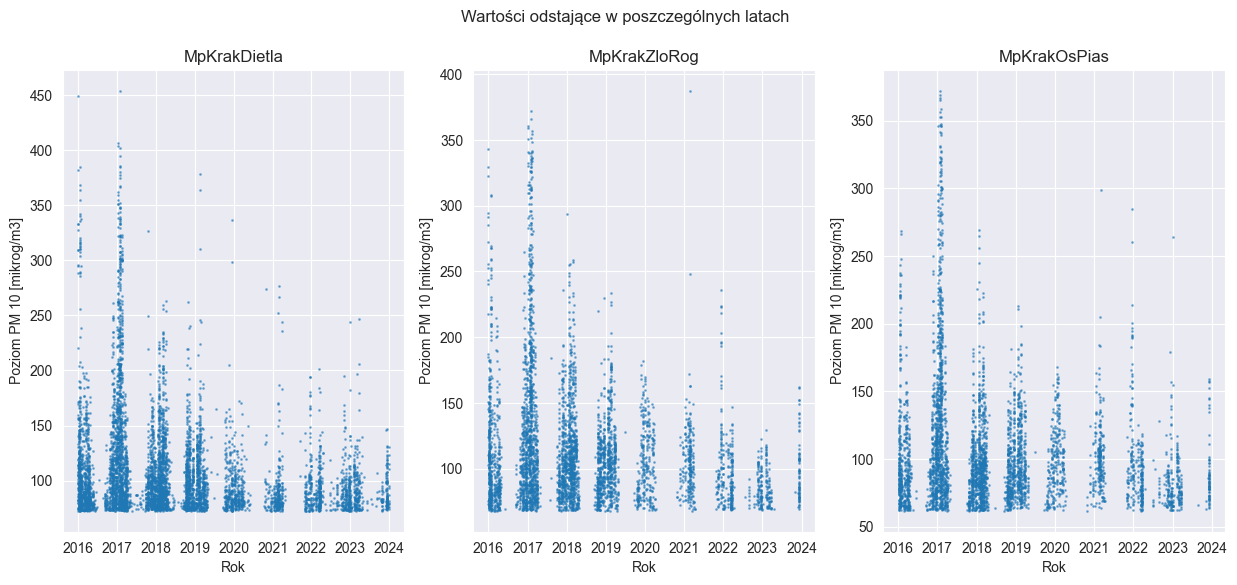

In [93]:
fig, axs = plt.subplots(1, 3, figsize=(15, 6))
for i, ax in enumerate(axs.flat):
    ax.scatter(x=outliers.index, y=outliers.iloc[:, i], s=1, alpha=0.5)
    ax.set(ylabel='Poziom PM 10 [mikrog/m3]')
    ax.set(xlabel='Rok')
    ax.set_title(data.columns[i])
plt.suptitle("Wartości odstające w poszczególnych latach")
plt.show()
# probably not error, just extreme values

## Date features

In [94]:
data['month'] = data.index.month
data['day_of_week'] = data.index.dayofweek + 1    # index starts at 0 
data['day'] = data.index.day 
data['year'] = data.index.year

In [95]:
day_off_idx = data.loc[(data['day_of_week'] == 6) | (data['day_of_week'] == 7)].index
data['day_off'] = 0
data.loc[day_off_idx, 'day_off'] = 1

In [96]:
holidays_dates = []
years = range(2016, 2024) 
for ptr in holidays.Poland(years = years).items(): 
    #print(ptr[0]) 
    holidays_dates.append(ptr[0])

In [97]:
data['date'] = data.index.date
data.loc[data['date'].isin(holidays_dates), 'day_off'] = 1

In [98]:
# sin-cos instead of one-hot encoding
# cyclical variable
data['month_sin'] = np.sin(2 * np.pi * data['month'] / 12)
data['month_cos'] = np.cos(2 * np.pi * data['month'] / 12)

In [99]:
data['hour'] = data.index.hour

In [100]:
data['hour_sin'] = np.sin(2 * np.pi * data['hour'] / 24)
data['hour_cos'] = np.cos(2 * np.pi * data['hour'] / 24)

In [101]:
# wind direction in degree 0-360 
data['sin_WindDir'] = np.sin(np.deg2rad(data.WindDirection))
data['cos_WindDir'] = np.cos(np.deg2rad(data.WindDirection))

In [102]:
data.isnull().sum()

MpKrakDietla        1423
MpKrakZloRog        1560
MpKrakOsPias        3165
AirTemp                1
rainIntensity          1
rainAccumulation       1
maxWindSpeed           1
RelativeHumidity       1
WindDirection          1
WindSpeed              1
AirPressure            1
month                  0
day_of_week            0
day                    0
year                   0
day_off                0
date                   0
month_sin              0
month_cos              0
hour                   0
hour_sin               0
hour_cos               0
sin_WindDir            1
cos_WindDir            1
dtype: int64

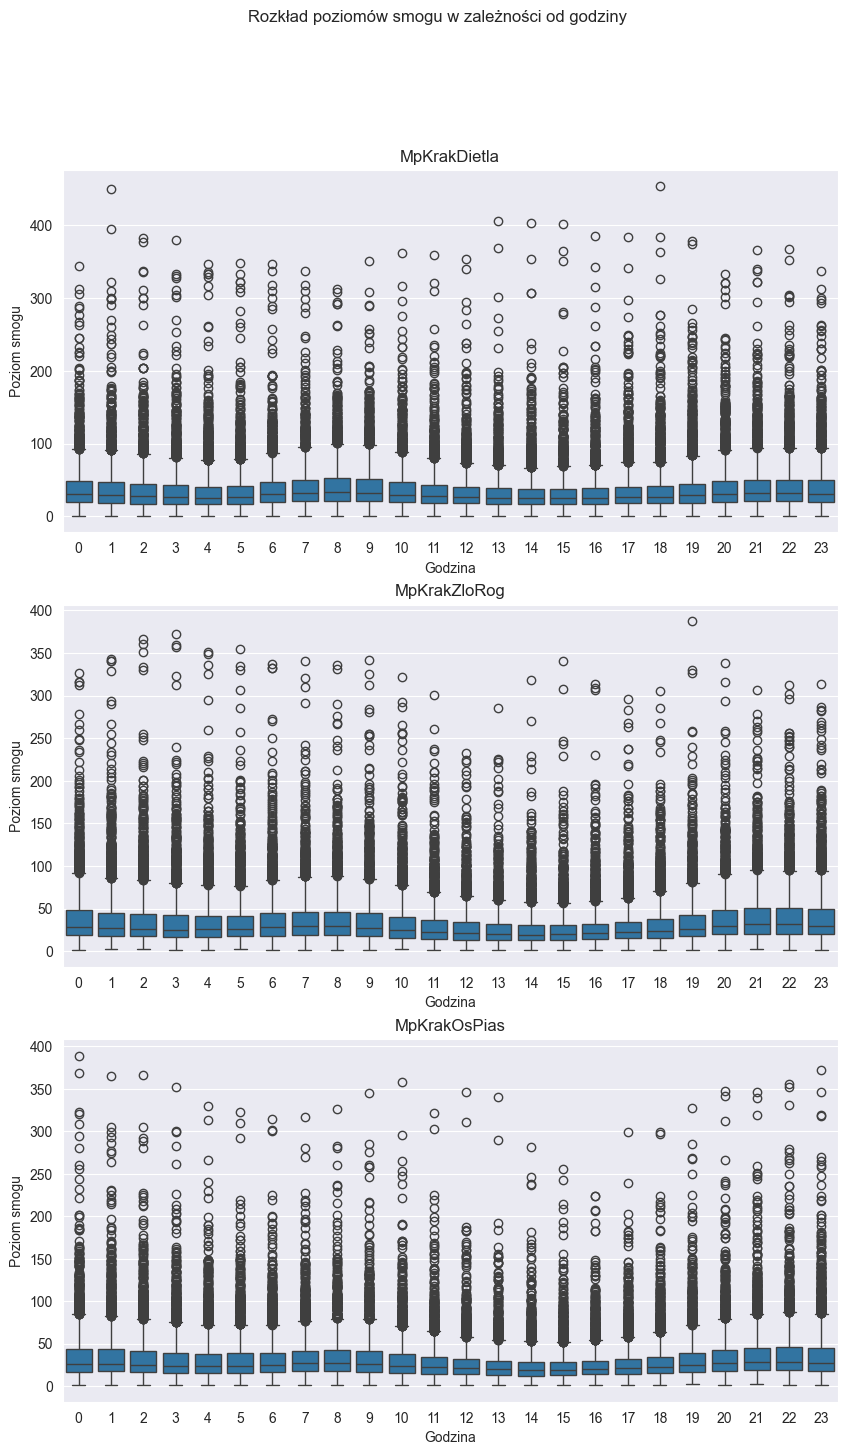

In [111]:
fig, axs = plt.subplots(3, 1, figsize=(10, 16))

for i, ax in enumerate(axs.flat):
    sns.boxplot(data=data, x='hour', y=data.columns[i], ax=ax)
    ax.set_xlabel('Godzina')
    ax.set_ylabel('Poziom smogu')
    ax.set_title(data.columns[i])

plt.suptitle('Rozkład poziomów smogu w zależności od godziny')
plt.show()

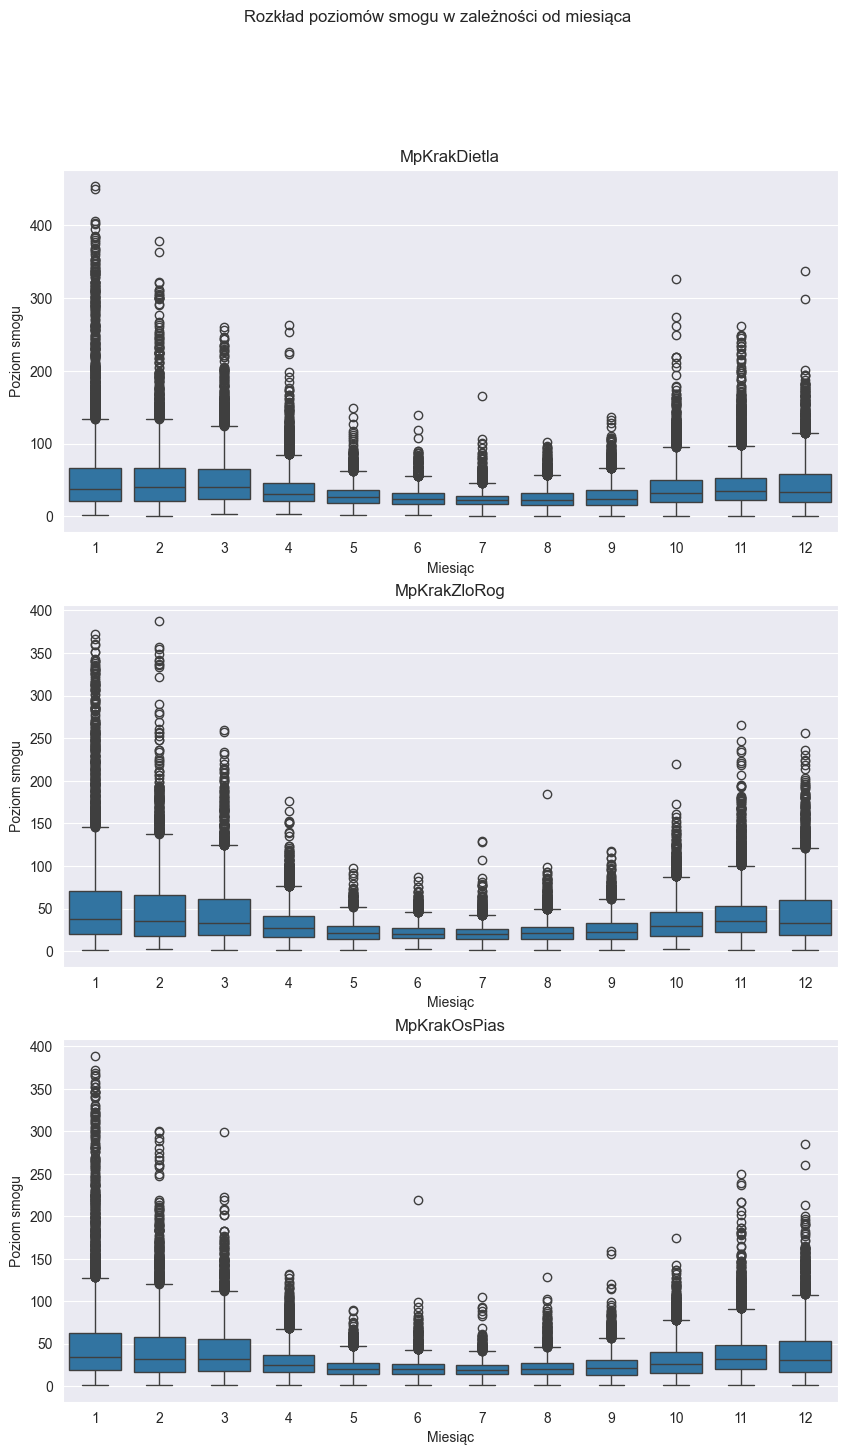

In [112]:
fig, axs = plt.subplots(3, 1, figsize=(10, 16))

for i, ax in enumerate(axs.flat):
    sns.boxplot(data=data, x='month', y=data.columns[i], ax=ax)
    ax.set_xlabel('Miesiąc')
    ax.set_ylabel('Poziom smogu')
    ax.set_title(data.columns[i])

plt.suptitle('Rozkład poziomów smogu w zależności od miesiąca')
plt.show()

In [113]:
data = data.drop(['day', 'day_of_week', 'date', 'hour', 'month', 'WindDirection'], axis=1)

In [123]:
data = data.iloc[:-1, :]

In [124]:
data.to_csv('preprocessed/data1h.csv')

### Features importance

In [125]:
data = pd.read_csv('preprocessed/data1h.csv', index_col=0, parse_dates=True)

In [135]:
data = data.dropna()

In [142]:
def train_test(col_number, size=60000): 
    X_train = data.iloc[:size, 3:]
    y_train = data.iloc[:size, col_number]
    return X_train, y_train

In [143]:
from sklearn.preprocessing import StandardScaler
def standardization(X_train, cols_to_scale):
    X_train_scaled = X_train.copy()
    scaler = StandardScaler()
    X_train_scaled[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
    return X_train_scaled

In [144]:

cols_to_scale = ['AirTemp', 'rainIntensity', 'rainAccumulation', 'maxWindSpeed', 'RelativeHumidity', 
                 'WindSpeed', 'AirPressure', 'year']

In [145]:
from sklearn.ensemble import RandomForestRegressor

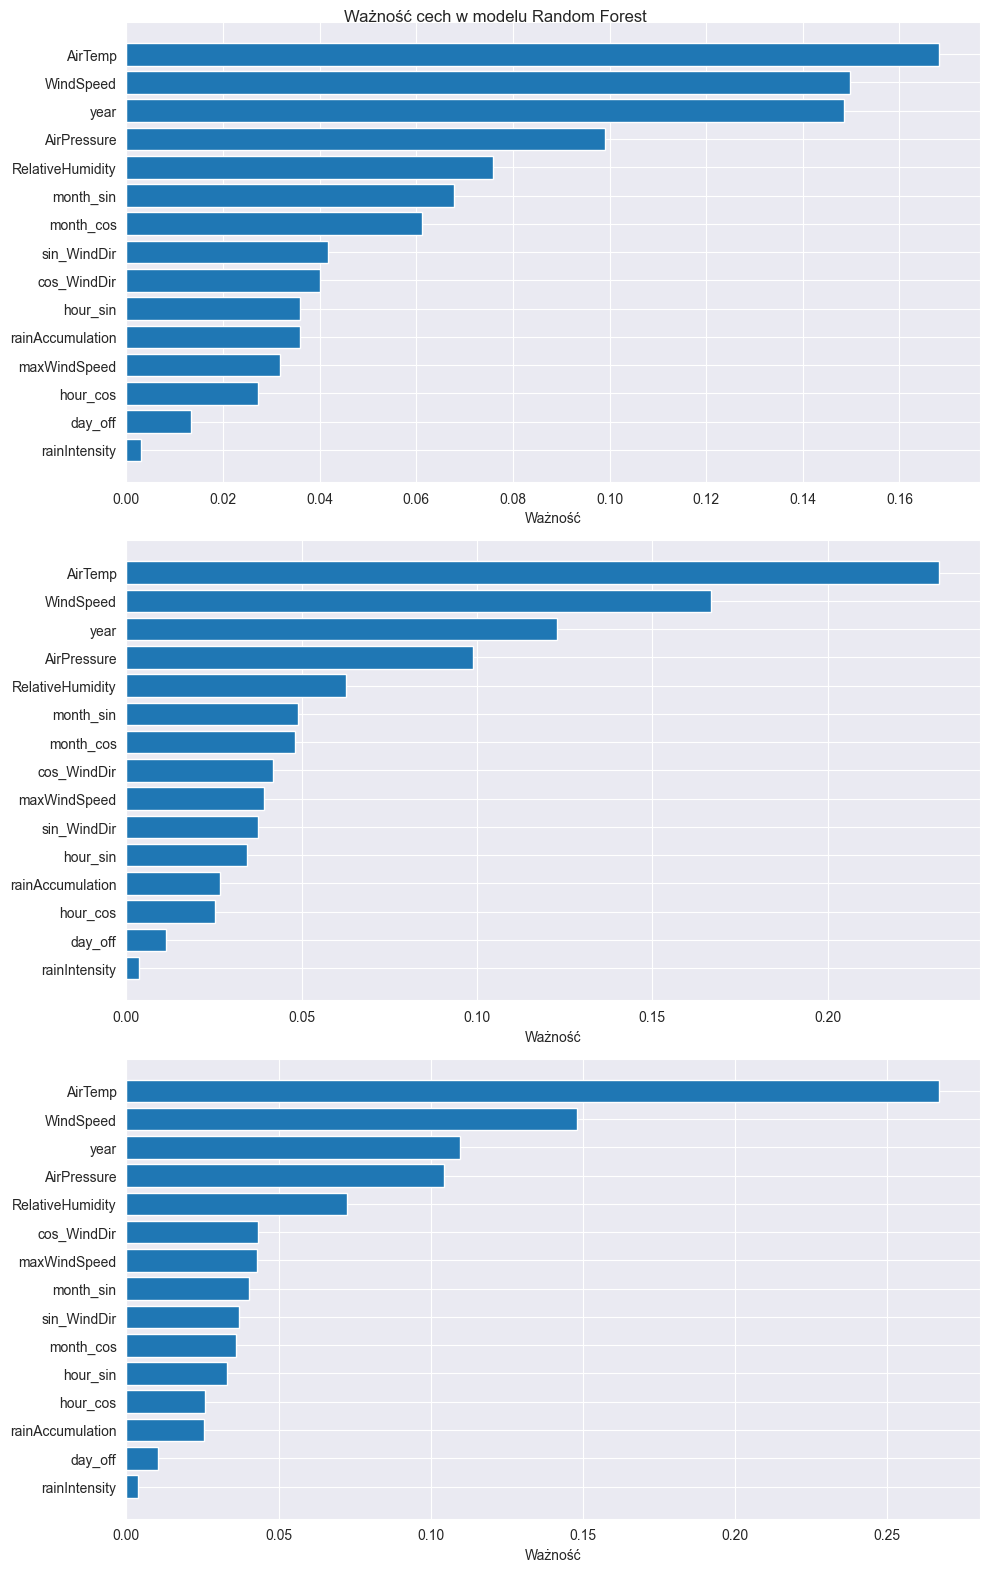

In [150]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=44)
fig, axs = plt.subplots(3, 1, figsize=(10, 16))

for i, ax in enumerate(axs.flat):
    X_train, y_train = train_test(i)    
    rf_model.fit(X_train, y_train)
    importances = rf_model.feature_importances_
    indices = importances.argsort()

    ax.barh(range(len(indices)), importances[indices], align="center")
    ax.set_yticks(range(len(indices)))
    ax.set_yticklabels(X_train.columns[indices])
    ax.set_xlabel("Ważność")

plt.suptitle("Ważność cech w modelu Random Forest")
plt.tight_layout()
plt.show()


In [148]:
from sklearn.linear_model import Lasso

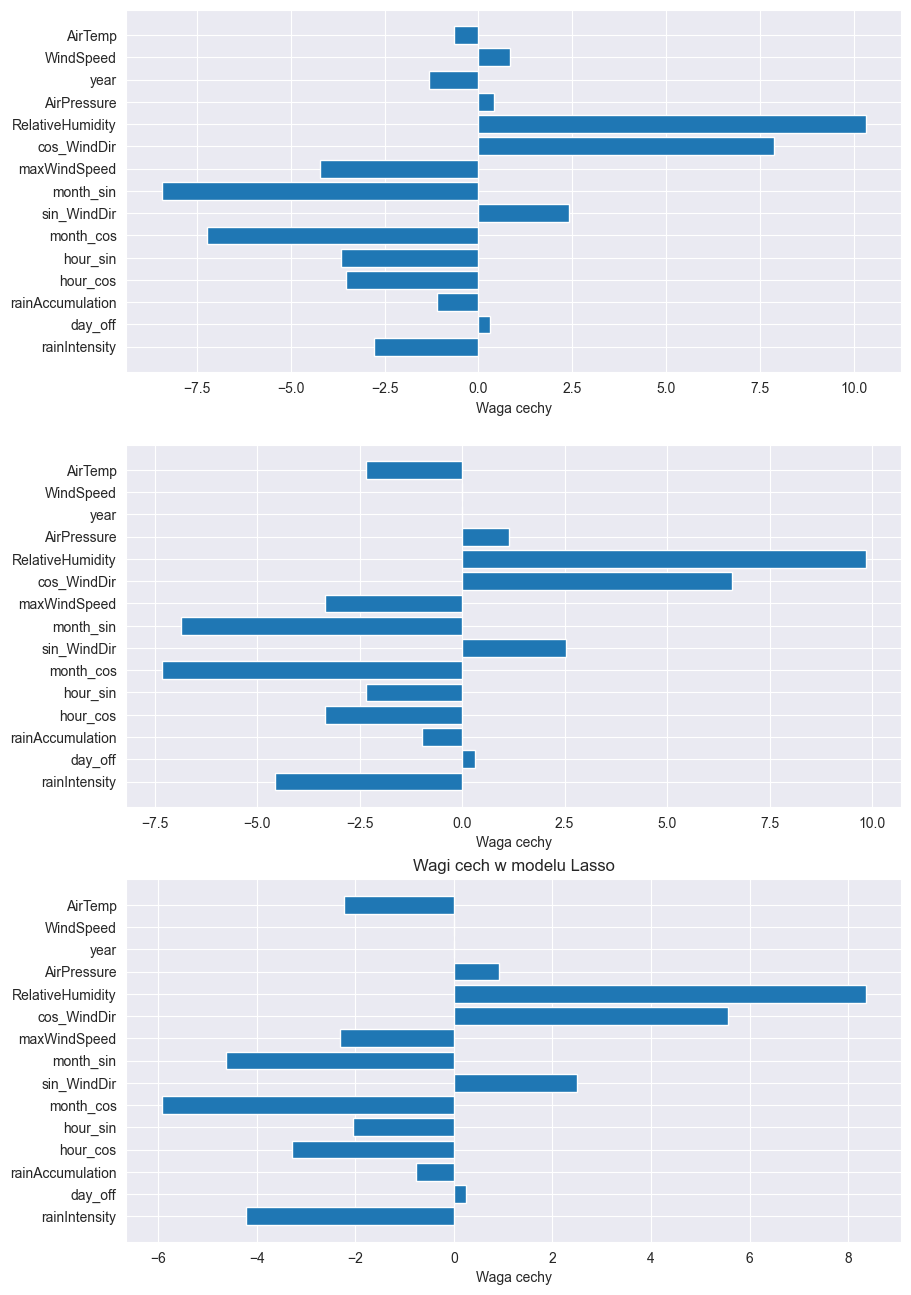

In [149]:
lasso = Lasso(alpha=0.3) 
fig, axs = plt.subplots(3, 1, figsize=(10, 16))

for i, ax in enumerate(axs.flat):
    X_train, y_train = train_test(i)    
    X_train_scaled = standardization(X_train, cols_to_scale)
    lasso.fit(X_train_scaled, y_train)
    lasso_coef = lasso.coef_
    importances = rf_model.feature_importances_
    indices = importances.argsort()
    #ax.barh(range(len(indices)), importances[indices], align="center")
    ax.set_yticks(range(len(indices)), X_train.columns[indices])
    ax.set_xlabel("Waga cechy")
    ax.barh(X_train.columns, lasso_coef)
plt.title("Wagi cech w modelu Lasso")
plt.show()